<a href="https://colab.research.google.com/github/Deolinda1506/Linear_regression_model/blob/main/summative/linear_regression/multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📓 Predicting Incident Resolution Time (in Hours) Regression Model





In [60]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib
from sklearn.linear_model import SGDRegressor




# Load the Dataset
Let's start by loading and inspecting the dataset

In [61]:
# 1. Load dataset
df = pd.read_csv('Global_Cybersecurity_Threats_2015-2024.csv')

In [82]:
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [63]:
print(f"Dataset Shape: {df.shape}")


Dataset Shape: (3000, 10)


In [64]:
df.info()  #information about the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [65]:
df.isnull().sum()    # ensuring there are no null values in the dataset


,0
Country,0
Year,0
Attack Type,0
Target Industry,0
Financial Loss (in Million $),0
Number of Affected Users,0
Attack Source,0
Security Vulnerability Type,0
Defense Mechanism Used,0
Incident Resolution Time (in Hours),0


In [66]:
print(df.columns)


Index(['Country', 'Year', 'Attack Type', 'Target Industry',
       'Financial Loss (in Million $)', 'Number of Affected Users',
       'Attack Source', 'Security Vulnerability Type',
       'Defense Mechanism Used', 'Incident Resolution Time (in Hours)'],
      dtype='object')


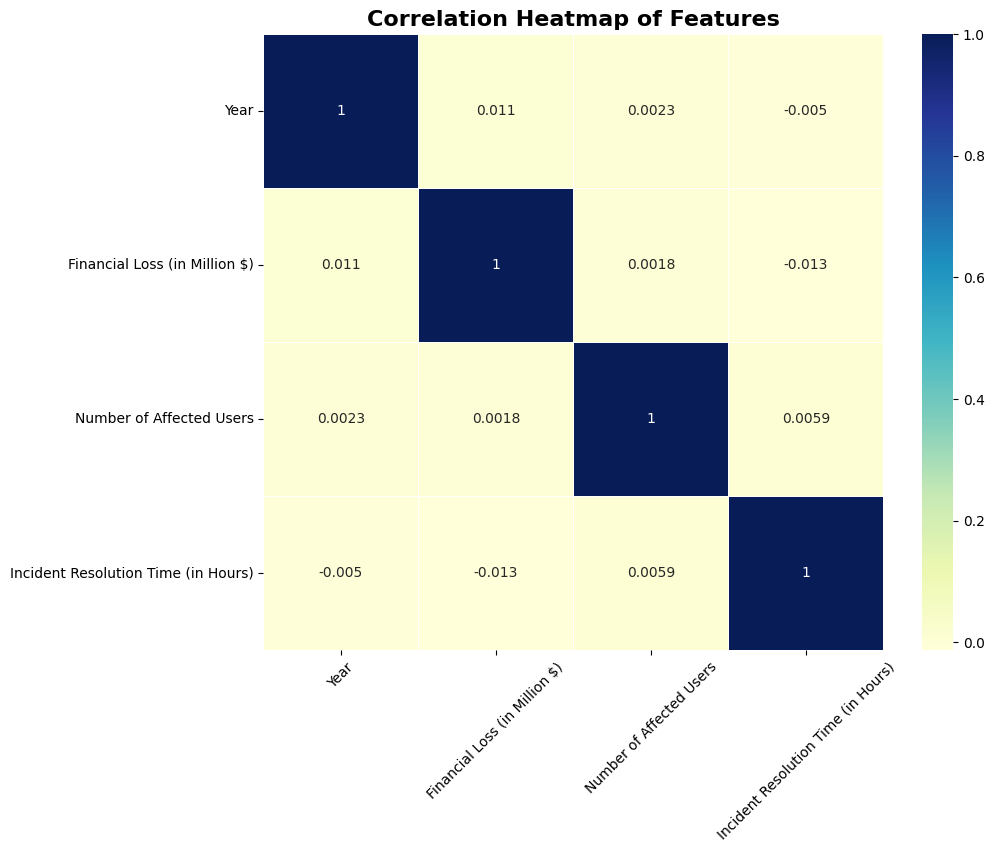

In [67]:
# Filter numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot heatmap with new color scheme
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu', linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap of Features', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

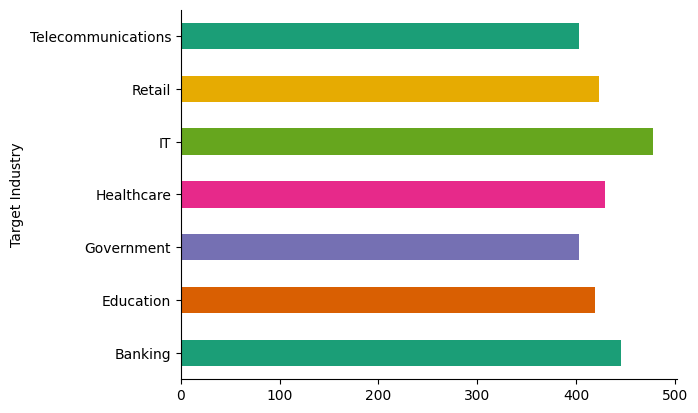

In [68]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Target Industry').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)




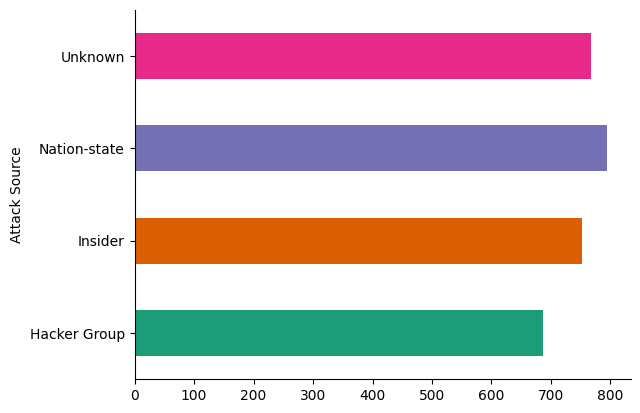

In [69]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Attack Source').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

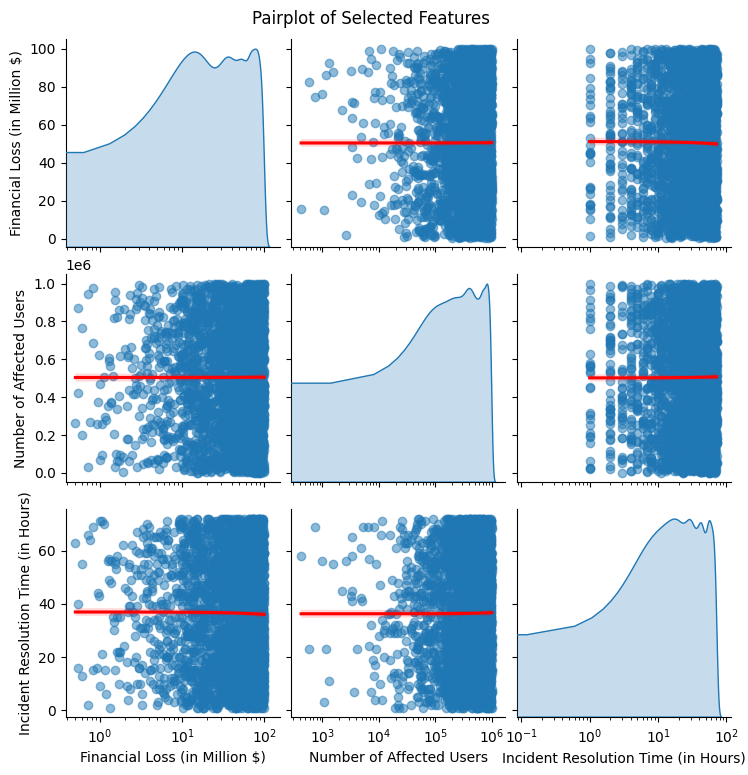

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data Visualization: Pairplot for Key Variables with Enhancements
g = sns.pairplot(df[['Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']],
                 kind='reg',
                 diag_kind='kde',
                 plot_kws={'line_kws':{'color':'red'}, 'scatter_kws':{'alpha':0.5}},
                 diag_kws={'fill':True}
                )

# Apply logarithmic scaling to axes where appropriate
g.axes[0, 0].set_xscale('log')  # Financial Loss (x-axis)
g.axes[1, 0].set_xscale('log')  # Financial Loss (x-axis)
g.axes[2, 0].set_xscale('log')  # Financial Loss (x-axis)
g.axes[1, 1].set_xscale('log')  # Number of Affected Users (x-axis)
g.axes[2, 1].set_xscale('log')  # Number of Affected Users (x-axis)
g.axes[2, 2].set_xscale('log')  # Incident Resolution Time


plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

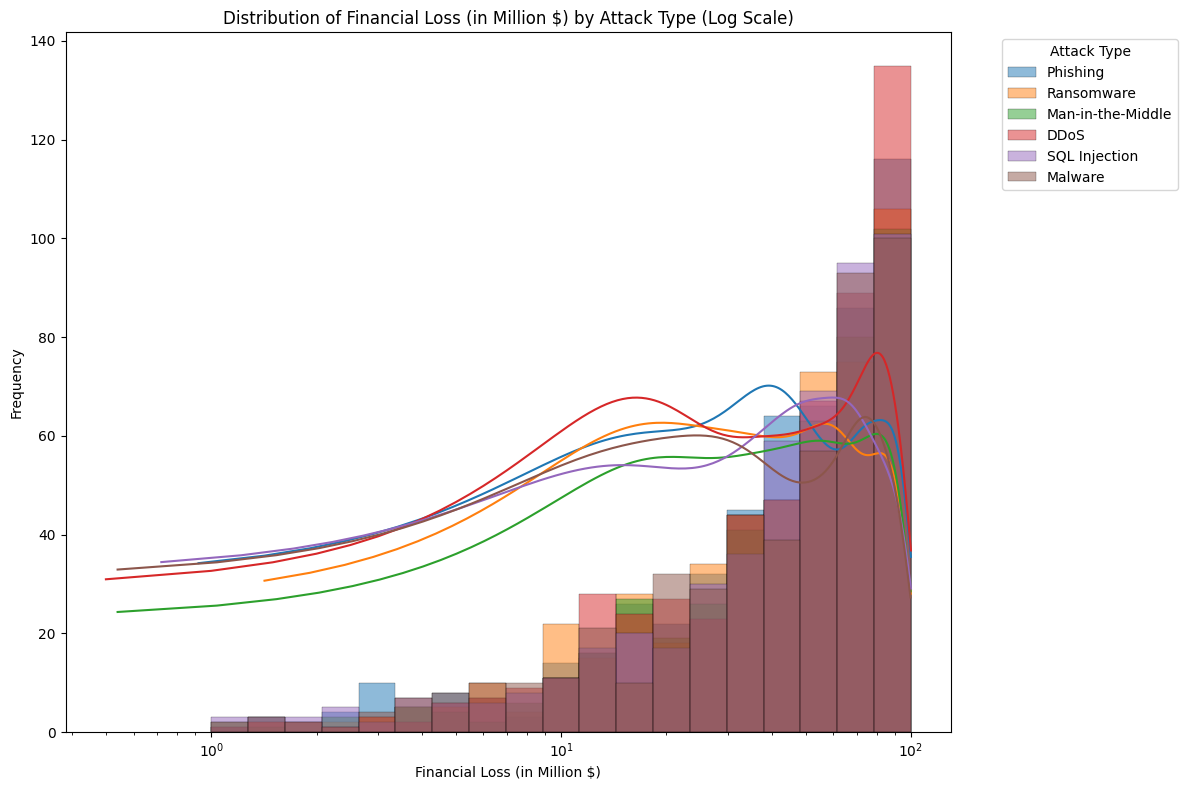

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 8))

# Create histograms for 'Financial Loss (in Million $)' for each 'Attack Type' (Log Scale)
for attack_type in df['Attack Type'].unique():
    subset = df[df['Attack Type'] == attack_type]
    sns.histplot(subset['Financial Loss (in Million $)'], bins=np.logspace(0, np.log10(df['Financial Loss (in Million $)'].max()), 20),
                 kde=True, label=attack_type)

plt.title('Distribution of Financial Loss (in Million $) by Attack Type (Log Scale)')
plt.xlabel('Financial Loss (in Million $)')
plt.ylabel('Frequency')
plt.xscale('log')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left') # Improved legend placement
plt.tight_layout()
plt.show()

# 📊 Data Preprocessing & Feature Selection:


In [73]:
# Select relevant features and target
features = ['Year', 'Financial Loss (in Million $)', 'Number of Affected Users', 'Target Industry', 'Attack Source', 'Security Vulnerability Type', 'Defense Mechanism Used', 'Country','Attack Type']  # Added 'Country', 'Attack Type'
target = 'Incident Resolution Time (in Hours)'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: OneHotEncoding for categorical variables, scaling for numerical variables
numerical_features = ['Year', 'Financial Loss (in Million $)', 'Number of Affected Users']
categorical_features = ['Country','Attack Type', 'Target Industry', 'Attack Source', 'Security Vulnerability Type', 'Defense Mechanism Used']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)  # Handle unknown values during prediction
    ])


# 📈 Implementing Gradient Descent for

---

Linear Regression


Train MSE: 431.47728628117545 | Test MSE: 456.5306475774193


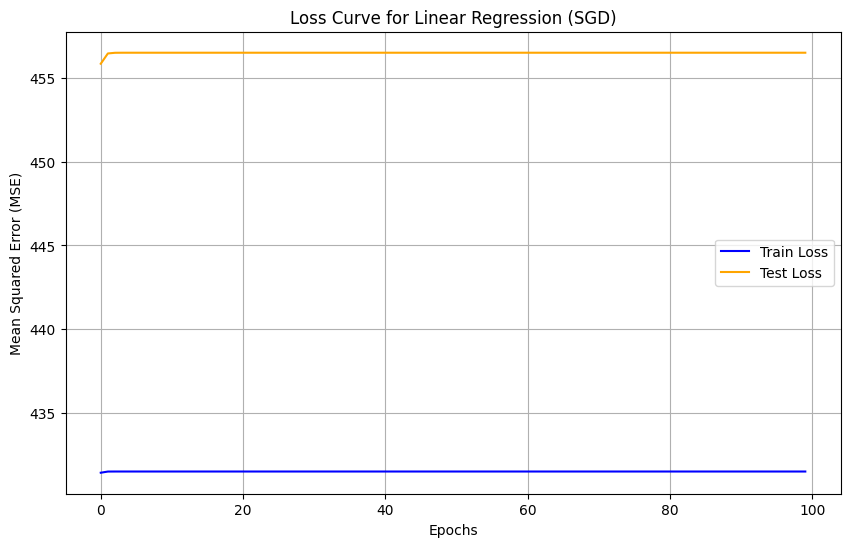

In [74]:
# Initialize SGDRegressor with warm_start to manually train multiple epochs
sgd_regressor = SGDRegressor(max_iter=1, tol=None, learning_rate='constant', eta0=0.01, random_state=42, warm_start=True)

# Pipeline with SGDRegressor
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', sgd_regressor)
])

# Lists to store loss values
train_loss = []
test_loss = []

# Number of epochs
epochs = 100

# Training loop for multiple epochs
for epoch in range(epochs):
    lr_pipeline.fit(X_train, y_train)

    # Predictions
    y_train_pred = lr_pipeline.predict(X_train)
    y_test_pred = lr_pipeline.predict(X_test)

    # Calculate MSE for train and test
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_loss.append(train_mse)
    test_loss.append(test_mse)

print(f"Train MSE: {train_mse} | Test MSE: {test_mse}")


# Plot Loss Curves
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), train_loss, label='Train Loss', color='blue')
plt.plot(range(epochs), test_loss, label='Test Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Loss Curve for Linear Regression (SGD)')
plt.legend()
plt.grid(True)
plt.show()


# 🧮  Implementing Linear Regression






Linear Regression - Train MSE: 417.56677580443335, Test MSE: 438.4435702827214
Linear Regression - Train R²: 0.011023044422779682, Test R²: -0.029115138202240987


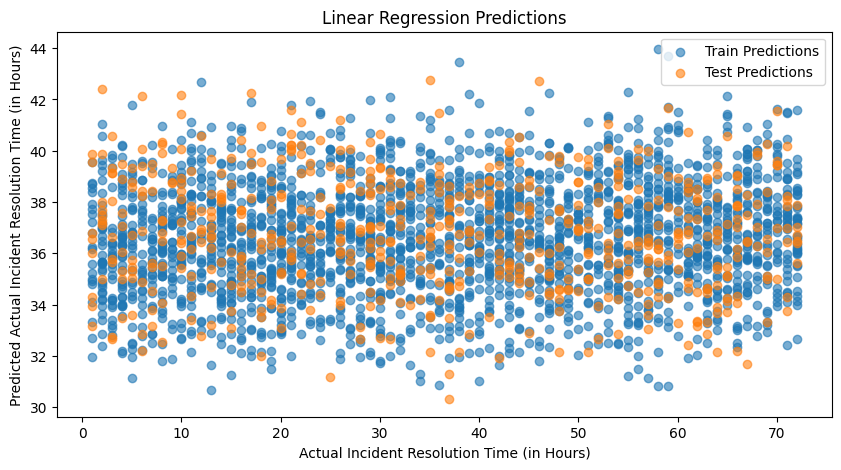

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear Regression Model
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

lr_pipeline.fit(X_train, y_train)

# Evaluate Linear Regression
y_train_pred_lr = lr_pipeline.predict(X_train)  # Assign predictions to y_train_pred_lr
y_test_pred_lr = lr_pipeline.predict(X_test)  # Assign predictions to y_test_pred_lr


train_mse_lr = mean_squared_error(y_train, y_train_pred_lr)
test_mse_lr = mean_squared_error(y_test, y_test_pred_lr)
train_r2_lr = r2_score(y_train, y_train_pred_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)

print(f'Linear Regression - Train MSE: {train_mse_lr}, Test MSE: {test_mse_lr}')
print(f'Linear Regression - Train R²: {train_r2_lr}, Test R²: {test_r2_lr}')


plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_train_pred_lr, label='Train Predictions', alpha=0.6)
plt.scatter(y_test, y_test_pred_lr, label='Test Predictions', alpha=0.6)
plt.title('Linear Regression Predictions')
plt.xlabel('Actual Incident Resolution Time (in Hours)')
plt.ylabel('Predicted Actual Incident Resolution Time (in Hours)')
plt.legend()
plt.show()

# 📈 Implementing Decision Tree and Randon Forest


In [76]:
# Decision Tree Model
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

dt_pipeline.fit(X_train, y_train)
# Evaluate Decision Tree
y_train_pred_dt = dt_pipeline.predict(X_train)
y_test_pred_dt = dt_pipeline.predict(X_test)

train_mse_dt = mean_squared_error(y_train, y_train_pred_dt)
test_mse_dt = mean_squared_error(y_test, y_test_pred_dt)
train_r2_dt = r2_score(y_train, y_train_pred_dt)
test_r2_dt = r2_score(y_test, y_test_pred_dt)

print(f'Decision Tree - Train MSE: {train_mse_dt}, Test MSE: {test_mse_dt}')
print(f'Decision Tree - Train R²: {train_r2_dt}, Test R²: {test_r2_dt}')

Decision Tree - Train MSE: 0.0, Test MSE: 815.9983333333333
Decision Tree - Train R²: 1.0, Test R²: -0.9153120139032533


In [77]:
# Random Forest Model
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42))
])

rf_pipeline.fit(X_train, y_train)

# Evaluate Random Forest
y_train_pred_rf = rf_pipeline.predict(X_train)
y_test_pred_rf = rf_pipeline.predict(X_test)

train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print(f'Random Forest - Train MSE: {train_mse_rf}, Test MSE: {test_mse_rf}')
print(f'Random Forest - Train R²: {train_r2_rf}, Test R²: {test_r2_rf}')

Random Forest - Train MSE: 265.2948828940985, Test MSE: 440.3320120943268
Random Forest - Train R²: 0.37166810000779016, Test R²: -0.0335476905023786


# 🏆  Saving the Best Model


In [78]:
# Choose Best Model
if test_mse_lr < test_mse_dt and test_mse_lr < test_mse_rf:
    best_model = lr_pipeline
    print("Best model: Linear Regression")
elif test_mse_dt < test_mse_rf:
    best_model = dt_pipeline
    print("Best model: Decision Tree")
else:
    best_model = rf_pipeline
    print("Best model: Random Forest")

Best model: Linear Regression


In [79]:
joblib.dump(best_model, 'best_model.joblib')
print("Best model saved as best_model.joblib")

Best model saved as best_model.joblib


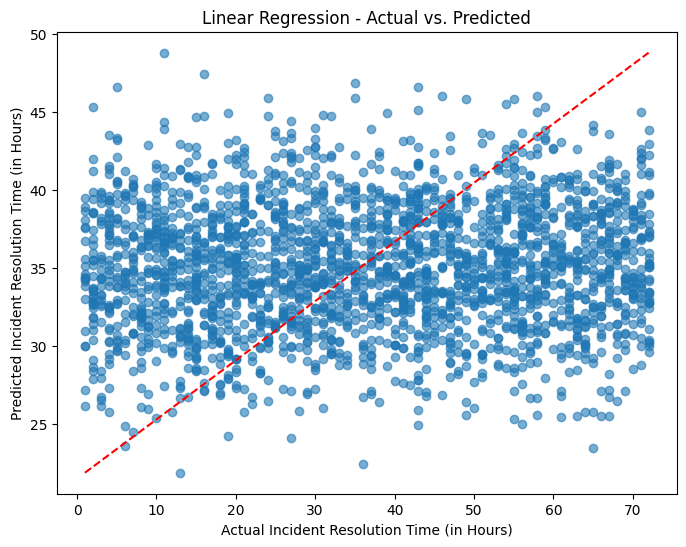

In [80]:
# Plot scatter plot with linear regression line
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, alpha=0.6)
plt.plot([min(y_train), max(y_train)], [min(y_train_pred), max(y_train_pred)], color='red', linestyle='--')
plt.xlabel("Actual Incident Resolution Time (in Hours)")
plt.ylabel("Predicted Incident Resolution Time (in Hours)")
plt.title("Linear Regression - Actual vs. Predicted")
plt.show()

In [81]:
# Script for making predictions (updated)
def predict_resolution_time(input_data):
    model = joblib.load('best_model.joblib')
    prediction = model.predict(input_data)
    return prediction[0]

# Select a row from X_test
sample_input = X_test.iloc[0]

print(f'Predicted Incident Resolution Time (in Hours): {predicted_resolution_time}')



Predicted Incident Resolution Time (in Hours): 35.706297102091476
